In [169]:
# Import Modules
import os
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import time
import numpy as np
import pandas as pd
%matplotlib inline

In [44]:
# %load https://raw.githubusercontent.com/fisicatyc/numericos-interactivo/master/project_2014_numerical_methods/Numericos/lib/integrators/compositerules/comptraprule.py
"""
    Description: function comptraprule is part of the Composite Integration
    Techniques and can be thought as an upgrated version of Trapezoidal rule
    integration technique that aproximates a defined integal evaluated in [a,b]
    with better presicion in larger intervals. It's truncation error is of order
    h^2 and defined by a second order derivative. Similar to compmidtrule but
    request more operations Presicion is similar to Composite midpoint rule.
    Difference from the other methods is the need of only one integration interval
    therefore the number of subintervals can be even or odd.
    
    Inputs: lowerlimit - float - defines first limit of integration.
            upperlimit - float - defines last limit of integration.
            redc - integer - integer that reduces space grid in domain.
            function - function type object - evaluates f(x) at x.
            
    Outputs: integ - float - defined integral aproximation
    
    Example line: integ = comptraprule(-2, 2, 40, (lambda x: 3*x**4));
                  
    Dependencies: None.
    
    Version: 1.2 for Python 3.4
    
    Definitions were taken from:
        Richard L. Burden, J. Douglas Faires. "Numerical Analysis" 9th ed.
        "Chapter 4 - Numerical Differentiation and Integration". 
        Cengage Learning. 2010. pp: 153 - 156.
        
    Author: J.J. Cadavid - SFTC - EAFIT University.
    Contact: jcadav22@eafit.edu.co
    
    Date: 28/12/2014.
"""

def comptraprule (lowerlimit, upperlimit, redc, function):

#  Input error verification   
    if redc % 2 != 0:
        raise Exception('Reduced inverval - redc- must be an even integer');
        
    test = lambda: None;
    if isinstance(function,type(test)) == 0:
        raise Exception("function must be lambda object-type");
        
# Zero initialing        
    sumf = 0.0;
        
# Space grid size
    h = (upperlimit - lowerlimit)/redc;
 
# Main loop - Composite trapezoidal rule approximation .
    for k in range(1, redc):
        sumf = sumf + 2*function(lowerlimit + k*h);
        
    integ = 0.5*h*(sumf + function(upperlimit) + function(lowerlimit));
    
    return(integ);

In [181]:
# Planck parameters
h = 6.62607004*10**-34;
c = 3.0*10**8;
Kb = 1.38064852*10**-23;
TemperatureVect = [500,2500,4000,5780,7250];
VectSize = len(TemperatureVect);

# Data initialization
dataSize = 50;
IntegSamples = 100 # Defines the number of samples
RadianceMat = [[0 for x in range(dataSize)] for x in range(VectSize)];
EnergyData = [0]*VectSize;
waveLengthMin = 100*10**-9;
waveLengthMax = 2000*10**-9;
waveLengthVect = np.linspace(waveLengthMin,waveLengthMax,dataSize);

# Planck's Law function
for n in range(0,VectSize):
    B = lambda waveLength: (2*h*c**2)/waveLength**5*(1/(np.exp((h*c)/(waveLength*Kb*TemperatureVect[n]))-1));
    RadianceMat[n][:] = B(waveLengthVect);
    EnergyData[n]= comptraprule(waveLengthMin, waveLengthMax, IntegSamples, B);

Frame = pd.DataFrame(EnergyData,index=TemperatureVect, columns=['Total Energy'])
Frame;

,Total Energy
500,0.358755
2500,445878.365127
4000,3949892.500594
5780,18902104.924807
7250,48105063.417381


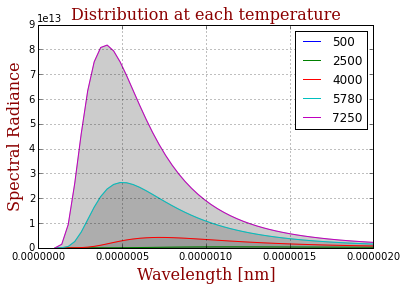

In [183]:
# Plot parameters
font = {'family' : 'serif','color'  : 'darkred', 'weight' : 'normal', 'size'   : 16} # font used in axes legend
for n in range(0,VectSize):
    plt.plot(waveLengthVect,RadianceMat[n][:], label = TemperatureVect[n],);
    plt.fill_between(waveLengthVect,RadianceMat[n][:], alpha=0.05*n, facecolor='k')
plt.axis('auto') # according to list data, axes are adjust in the plot
plt.title('Distribution at each temperature', fontdict=font); 
plt.xlabel('Wavelength [nm]', fontdict=font);
plt.ylabel('Spectral Radiance', fontdict=font);
plt.grid();
plt.legend();
plt.show();